In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Roots

A *root* or *zero* of a function $f(x)$ is simply a value of $x$ for which $f(x)=0$.

Equality of two functions $f(x)$ and $g(x)$ is equivalent to the root of their difference

  $$f(x) = g(x)$$
  $$f(x) - g(x) = 0$$
  
Minima/maxima of functions can be determined by finding the roots of the first derivative

  $$f'(x) = 0$$


### In or out of bounds

Assume that we can "bracket" a root $x_0$, so that we know 

  $$\mathrm{xlim} = [x_{lo}, x_{hi}]$$
  
such that 

  $$ x_{lo} < x_0 < x_{hi} $$
  
then for $y = f(x)$

  $$ y_{lo} < 0 < y_{hi} $$
  
or

  $$ y_{lo} > 0 > y_{hi} $$

and the product of the y-bounds should always be negative

  $$ y_{lo} \, \times \, y_{hi} < 0 $$

# Roots of polynomials

The *y-intercept* of a straight line

  $$ y = ax + b $$
  
is the value of $x$ for which $y=0$.  This can be found by solving for

  $$ x = \left. \frac{y-b}{a} \right|_{y=0} = -\frac{b}{a}$$


A quadratic is only slightly more complicated

  $$ y = a x^2 + b x + c $$
  
but calculating the "roots" or "zeros" of the equation requires a bit more work
  
  $$ x = \frac{-b \pm \sqrt{b^2-4ac} }{2a} $$
  
to deal with the possibility of dividing by zero or taking the square root of a negative number.
  
  
Any arbitrary N-th order polynomial

  $$ y = \sum\limits_{n=0}^{N} a_n \, x^n $$
  
will have $N$ roots in the complex plane, although they are not necessarily all unique.  

## numpy.polynomial.Polynomial

Polynomials in NumPy can be created, manipulated, and even fitted using the numpy.polynomial package which was introduced in NumPy 1.4.

Prior to NumPy 1.4, numpy.poly1d was the class of choice and it is still available in order to maintain backward compatibility. However, the newer Polynomial package is more complete than numpy.poly1d and its convenience classes are better behaved in the numpy environment. Therefore Polynomial is recommended for new coding.

The various routines in the Polynomial package all deal with series whose coefficients go from degree zero upward, which is the reverse order of the Poly1d convention. The easy way to remember this is that indexes correspond to degree, i.e., coef[i] is the coefficient of the term of degree i.

In [3]:
from numpy.polynomial import Polynomial as npoly

# Make a polynomial object with c0=-9, c1=3, c2=6
#
p = npoly( [-9,3,6] )

# Look at the object type and check the coefficients
#
print( type(p) )
print( 'coefficients: ', p.coef )
#dir(p)    # use this to get a complete list of attributes and methods

<class 'numpy.polynomial.polynomial.Polynomial'>
coefficients:  [-9.  3.  6.]


In [4]:
# evaluate at x=0, should be y=c0
#
y0 = p(0)
c0 = p.coef[0]
print( y0,c0 )

# testing for floating point equality is a terrible idea
# that sometimes works
#
assert( y0 == c0)                   
assert( np.abs( y0 - c0 ) <= 1e-12 )
print( '{:50.40f}'.format( y0 ) )

-9.0 -9.0
       -9.0000000000000000000000000000000000000000


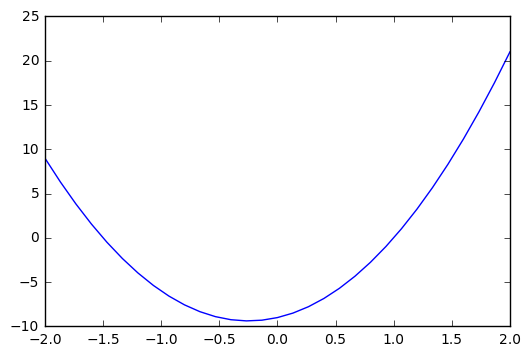

In [5]:
# try a quick plot
#
x = np.linspace(-2, +2, 31)
y = p(x)
plt.plot(x, y)

In [6]:
# the Polynomial object knows how to find its own roots
#
xzeros = p.roots()
print( type(xzeros) )
print( xzeros, p( xzeros) )

<class 'numpy.ndarray'>
[-1.5  1. ] [ 0.  0.]


In [7]:
# the Polynomial object can do calculus on itself
deriv = p.deriv()
print( type(deriv) )
print( deriv.coef )

<class 'numpy.polynomial.polynomial.Polynomial'>
[  3.  12.]


In [8]:
# roots of derivatives are minima or maxima 
#
xextrema = deriv.roots()
print( xextrema, deriv(xextrema) )
print( xextrema, p(xextrema) )

[-0.25] [ 0.]
[-0.25] [-9.375]


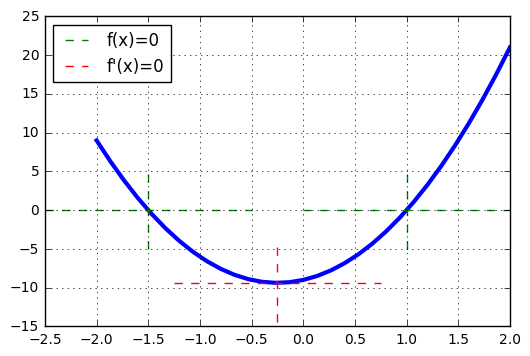

In [9]:
x = np.linspace(-2, +2, 31)
y = p(x)
plt.plot(x, y, lw=3)
plt.grid('on')

for i,xz in enumerate(xzeros):
    yz = p(xz)
    label = 'f(x)=0' if i==0 else ''
    plt.plot([xz,xz],[yz-5,yz+5], 'g--', label=label)
    plt.plot([xz-1,xz+1],[yz,yz], 'g--')    
    
for i,xz in enumerate(xextrema):
    label="f'(x)=0"
    yz = p(xz)
    plt.plot([xz,xz],[yz-5,yz+5], 'r--',label=label)
    plt.plot([xz-1,xz+1],[yz,yz], 'r--')
    
plt.legend(loc=0)

# Roots of functions
It would be extremely useful to be able to find the roots $z_k$ of an arbitrary function

  $$ f(z_k) = 0 $$
  
This could be used to solve more general problems, such as finding the intersection of two functions

  $$ b x \cos x = \sin x $$
  
which could also be written as

  $$ b x - \tan x = 0 $$

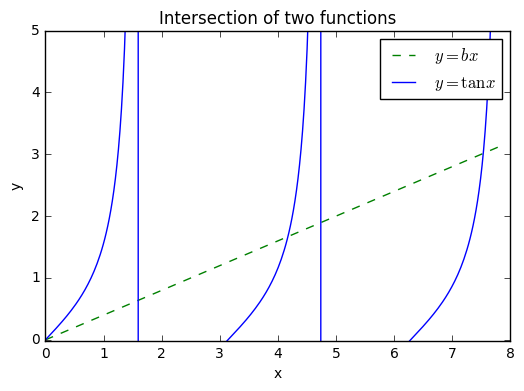

In [10]:
b = 0.4
x = np.linspace( -0.0*np.pi, 2.5*np.pi, 301)
y1 = b * x
y2 = np.tan(x)

plt.plot( x, y1, 'g--', label='$y=bx$')
plt.plot( x, y2, 'b-', label='$y=\\tan x$')
plt.ylim( -0.01, 5.0 )
plt.legend(loc=0)
plt.title('Intersection of two functions')
plt.xlabel('x')
plt.ylabel('y')

## Plot tuning

The previous plot is pretty good, but the vertical lines at $\tan x = n \pi / 2$ really shouldn't be there.

One way to deal with this kind of thing is to use the fact that matplotlib will default to treating "not-a-number" values as missing points.

We can combine this with numpy array indexing to select all points less than zero and set them to "np.nan".

In [11]:
# Example of numpy array indexing: 
# find all values equal to two, and set them equal to three
#
x = np.array([0, 1, 2, 3, 4])
x[ x==2 ] = 3
print(x)

[0 1 3 3 4]


In [12]:
# Example of numpy array indexing: # extract all even values
#
x = np.array( [0, 1, 2, 3, 4] )
y = x[ x%2 == 0 ]
print(y)

[0 2 4]


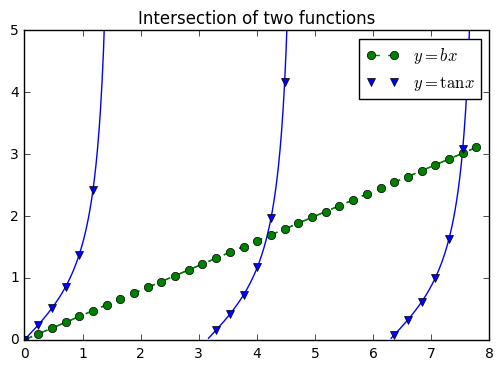

In [13]:
b = 0.4
x = np.linspace( -0.0*np.pi, 2.5*np.pi, 301)
y1 = b * x
y2 = np.tan(x)
y2[ y2 < 0.0 ] = np.nan  # skip plotting negative values

plt.plot( x, y1, 'g--')
plt.plot( x, y2, 'b-')
plt.title('Intersection of two functions')
plt.ylim( -0.01, 5.0 )

# Only plot every 9th symbol to reduce clutter.
#
# One alternative is setting markevery=9 in plot
#
plt.plot( x[::9], y1[::9], 'go--', label="$y=bx$")
plt.plot( x[::9], y2[::9], 'bv', label="$y=\\tan x$")

plt.legend(loc=0)

## Black box

The Scientific Python *optimize* module (scipy.optimize) contains many tools for numerically locating function zeros and extrema.  The *brentq* function is a good choice for finding roots.

In [14]:
import scipy.optimize as opt

# Define the function before searching for roots
#
def myfunc(x, b=0.4):
    return b*x - np.tan(x)

xzero = opt.brentq(myfunc, 3.5, 4.5, xtol=1.0e-08, rtol=1.0e-14, maxiter=50 )
print( 'solution  x: ',xzero, 'y: ', myfunc(xzero) ) 

solution  x:  4.1725967095893495 y:  3.62351437744e-09


In [15]:
# If in doubt: read the documentation
#
help(opt.brentq)

Help on function brentq in module scipy.optimize.zeros:

brentq(f, a, b, args=(), xtol=2e-12, rtol=8.8817841970012523e-16, maxiter=100, full_output=False, disp=True)
    Find a root of a function in a bracketing interval using Brent's method.
    
    Uses the classic Brent's method to find a zero of the function `f` on
    the sign changing interval [a , b].  Generally considered the best of the
    rootfinding routines here.  It is a safe version of the secant method that
    uses inverse quadratic extrapolation.  Brent's method combines root
    bracketing, interval bisection, and inverse quadratic interpolation.  It is
    sometimes known as the van Wijngaarden-Dekker-Brent method.  Brent (1973)
    claims convergence is guaranteed for functions computable within [a,b].
    
    [Brent1973]_ provides the classic description of the algorithm.  Another
    description can be found in a recent edition of Numerical Recipes, including
    [PressEtal1992]_.  Another description is at
   

## Bisection: slow but stable

The bisection algorithm can be written in a few lines of code and will work for virtually any case.  It is not, however, the most computationally efficient choice.

 0) Start with $x_{lo}, x_{hi}$ bracketing a root $x_0$.  

 1) Next, calculate the mid-point

  $$ x_{mid} = \frac{ x_{lo} + x_{hi}}{2} $$
  
and the value of $y_{mid} = f(x_{mid})$ at that midpoint.


 2) If $y_{mid}=0$ then we have found a root.  Remember, however, that testing for the equality of floating point numbers is unsafe.
 
 2a) If $|y_{mid}|$ is less than some small number $\epsilon$ then we might be close enough.

 3) Otherwise the root must be either in the first half of the interval $x_{lo}, x_{mid}$ or the second half $x_{mid}, x_{hi}$.  We can figure out which is the case by looking for $y_a \, \times \, y_b < 0$.  Take this sub-interval and apply step (1).  Repeat until finished.

In [16]:
def root_bisection(func, xlimits, eps=1e-6, maxiter=99, debug=False):
    """basic implementation of root-finding with bisection
    
    @func     single parameter function
    @xlimits  low, high bounds in 2 elements list/tuple/array 
    @eps      numerical precision, default 1e-6 (single precision)
    """
    
    xlo, xhi = xlimits  # unpack input into 2 variables
    ylo = myfunc(xlo)
    yhi = myfunc(xhi)
    
    if (ylo*yhi >= 0):
        print('Error- initial values do not bracket root')  # is this correct?
        return np.nan  # not-a-number is not None

    while maxiter > 1:
        maxiter -= 1
        
        xmid = (xlo + xhi) / 2.0  # could this cause trouble? explain why
        ymid = func(xmid)
        
        if np.abs(ymid - 0.0) <= eps:
            return xmid
    
        if (ylo*ymid < 0.0 ):
            xlo, xhi = xlo, xmid
            ylo, yhi = ylo, ymid
        
        elif (ymid*yhi < 0.0 ):
            xlo, xhi = xmid, xhi
            ylo, yhi = ymid, yhi

        else: print('Error- this should never happen: root is not in either subregion')
        
        if debug:
            print( '{:20.15g} \t {:+20.15e}'.format(xmid, ymid) )
            
    print('Warning- did not converge')
    return xmid

In [17]:
# pythonic way to assign multiple variables
#
xlo, xhi = 3.5, 4.5    

# Note how the y-value (right column) steadily decreases
# as we approach the root.
#
xzero = root_bisection( myfunc, (xlo, xhi), debug=True )
print( 'solution  x: ', xzero, 'y: ', myfunc(xzero) ) 

                   4 	 +4.421787176504226e-01
                4.25 	 -3.063090278580591e-01
               4.125 	 +1.480038871785188e-01
              4.1875 	 -5.190149274117384e-02
             4.15625 	 +5.370657416669955e-02
            4.171875 	 +2.440202014916126e-03
           4.1796875 	 -2.432916889329539e-02
          4.17578125 	 -1.084632437459132e-02
         4.173828125 	 -4.178790675770649e-03
        4.1728515625 	 -8.632599368865179e-04
       4.17236328125 	 +7.899755095601702e-04
      4.172607421875 	 -3.626558121050394e-05
     4.1724853515625 	 +3.769490578635626e-04
    4.17254638671875 	 +1.703652697970792e-04
    4.17257690429688 	 +6.705572816745331e-05
    4.17259216308594 	 +1.539654457283213e-05
    4.17259979248047 	 -1.043415052937036e-05
     4.1725959777832 	 +2.481288967182138e-06
    4.17259788513184 	 -3.976407794592518e-06
solution  x:  4.1725969314575195 y:  -7.47553667191e-07


## Functions are often expensive

In many cases the function evalutions are relatively time-consuming. A good root-finding algorithms will make as few calls to the function as possible.  This is usually accomplished by making assumptions about the shape of the function ie. that it can be locally approximated by a low order polynomial.

In [18]:
import time
def slow_func(x, b=0.4):
    """ simulate slow function by waiting for 1 millisecond
    """
    time.sleep(1e-2)  
    return b*x - np.tan(x)

#%timeit xzero = root_bisection( slow_func, (xlo, xhi) )
%timeit xzero = opt.bisect( slow_func, 3.5, 4.5, xtol=1.0e-7, maxiter=99 )
%timeit xzero = opt.brentq( slow_func, 3.5, 4.5, xtol=1.0e-7, maxiter=99 )

1 loop, best of 3: 263 ms per loop
10 loops, best of 3: 91.1 ms per loop


In [19]:
import time

# Make a modified function that will print out debugging information
#
def track_func(x, b=0.4, debug=True):
    y = b*x - np.tan(x)
    if debug: print(x,y)
    return y

# Derivative of the function with respect to x.
#
def fprime(x, b=0.4):
    dydx = b - 1.0/np.cos(x)**2
    return dydx

In [20]:
xlo, xhi = 3.5, 4.5

# bisection will get the right answer eventually
#
print('BISECT: ')
xzero =  opt.bisect( track_func, 3.5, 4.5, xtol=1.0e-7, maxiter=99 )

# brentq will be *much* faster
#
print('\nBRENTQ: ')
xzero =  opt.brentq( track_func, 3.5, 4.5, xtol=1.0e-7, maxiter=99 )

BISECT: 
3.5 1.02541435984
4.5 -2.83733205455
4.0 0.44217871765
4.25 -0.306309027858
4.125 0.148003887179
4.1875 -0.0519014927412
4.15625 0.0537065741667
4.171875 0.00244020201492
4.1796875 -0.0243291688933
4.17578125 -0.0108463243746
4.173828125 -0.00417879067577
4.1728515625 -0.000863259936887
4.17236328125 0.00078997550956
4.172607421875 -3.62655812105e-05
4.1724853515625 0.000376949057864
4.17254638671875 0.000170365269797
4.172576904296875 6.70557281675e-05
4.1725921630859375 1.53965445728e-05
4.172599792480469 -1.04341505294e-05
4.172595977783203 2.48128896718e-06
4.172597885131836 -3.97640779459e-06
4.1725969314575195 -7.47553667191e-07
4.172596454620361 8.66869086513e-07
4.17259669303894 5.96580689294e-08
4.17259681224823 -3.43947709203e-07
4.172596752643585 -1.4214479771e-07

BRENTQ: 
3.5 1.02541435984
4.5 -2.83733205455
3.765462510306323 0.786417591671
4.132731255153161 0.125627218322
4.19078150549607 -0.0637309861464
4.171243932720771 0.00456855323377
4.172550800118308 0.000

## Newton's method

An arbitrary differentiable function f(x) can be represented as a Taylor series expansion

  $$ f(x) = f(x_0) + f'(x_0) (x-x_0) + \ldots $$
  
An iterative approach to finding the roots $f(x)=0$

  $$ 0 = f(x_0) + f'(x_0) (x-x_0) + \ldots $$
  
only involves the linear term

  $$ x \approx x_0 - \frac{f(x_0)}{f'(x_0)} $$
  
starting with some initial value $x_0$ we obtain an estimate for the location of the root.

It is easy to show that this result will be exactly correct for a straight line.  

If the function is "well-behaved" then sucessive estimates

  $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$
  
should converge towards the correct value.

In the neighborhood of a simple zero the rate of convergence is at least quadratic.  This means that the number of correct digits roughly doubles with each step.


In [21]:
# "NEWTON" method without a derivative is similar to secant method.
#

# Note how changing the starting point can have dramatic effects.
#
print('NEWTON (bad initial value)')
xzero =  opt.newton( track_func, 3.5, None, tol=1.0e-7, maxiter=99 )

print('\nNEWTON (good initial value)')
xzero =  opt.newton( track_func, 4.0, None, tol=1.0e-7, maxiter=99 )

NEWTON (bad initial value)
3.5 1.02541435984
3.5004500000000003 1.02508113181
4.88474685367 7.69821376339
3.28780375664 1.16785952755
3.00221355074 1.34117414308
5.21221873993 3.91611611123
1.85111894261 4.21383181194
49.4237166101 20.8890905044
-10.1704592005 -3.14462183545
-2.37303099341 -1.91609386185
9.78835616824 3.53484892395
1.90189175073 3.66985378639
216.280624343 87.0446989629
-7.53427094151 0.00681587103857
-7.5517977173 0.187177323521
-7.53360860351 0.000388970068441
-7.5335707263 2.22416438489e-05
-7.53356842909 2.80388912088e-09

NEWTON (good initial value)
4.0 0.44217871765
4.0005 0.441207764615
4.2277034529 -0.207961967306
4.15491867148 0.0579409303938
4.17077866394 0.0061345291703
4.17265668643 -0.000203082093388
4.17259650717 6.88953905481e-07
4.17259671064 7.71127606214e-11


In [22]:
print('NEWTON (adequate initial value + derivative)')
xzero =  opt.newton( track_func, 3.75, fprime, tol=1.0e-17, maxiter=99 )
                      
print('\nNEWTON (good initial value + derivative)')
xzero =  opt.newton( track_func, 4.0, fprime, tol=1.0e-17, maxiter=99 )

NEWTON (adequate initial value + derivative)
3.75 0.803449148889
4.49038119248 -2.63394710908
4.3601539872 -0.976557755865
4.23811126435 -0.252709507529
4.18060572807 -0.0275275020534
4.17271642245 -0.000405397580684
4.1725967374 -9.05493984238e-08
4.17259671066 -4.21884749358e-15
4.17259671066 -1.33226762955e-15

NEWTON (good initial value + derivative)
4.0 0.44217871765
4.22786255952 -0.208631449474
4.17829639597 -0.0195048420913
4.17265733916 -0.000205292528633
4.17259671752 -2.32255072952e-08
4.17259671066 -1.33226762955e-15


## Assignment \#2

### 1) Use numpy.polynomial.legendre to generate a single plot showing the first five Legendre polynomials  with order from $N=1$ up to and including $N=5$ between $x=−1$ and $x=+1$

### 2) Use scipy.optimize.brentq to find all of the zeros of the Legendre polynomials with order from $N=1$ up to and including $N=5$.

### 3) Write a function to find zeros using the "secant method".  This is very similar to Newton's method, but uses a discrete estimate for the derivative.

The iteration step is

  $$ x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)} $$
  
and we stop when the new $x$ is very close to $x_1$ or the new function evaluation $f(x_1)$ is very close to zero

### 4) Apply your secant method function to find the roots of a Legendre polynomial for $N=5$.


### 5) Apply your secant method function to the "myfunc" function.  Use a range of different starting points as given by  x = np.linspace(-1.0, 10.0, 101) and find the resulting roots.  Discuss your results.

In [135]:
#Question 1
def generateLegendrePolynomials(degree):
    """
    This function takes in an input and generates a list 
    of legendre polynomial objects with the appropriate 
    legendre polynomial degree, from 0 to the degree
    specified. It essentially rewrites and automates the
    creation of a list of legendre polynomials from degree
    zero to the degree specified.
    
    Params:
        degree: How high a degree of legendre polynomials
        you want generated.
    Returns:
        lPolys: A list of Legendre Polynomial Objects 
        with degrees from 0 to the degree specified.
    
    """
    lPolys = []
    coefficients = [1]
    for iteration in range(degree+1):
        lPolys.append(np.polynomial.legendre.Legendre(coefficients))
        coefficients.insert(0,0)
    return lPolys

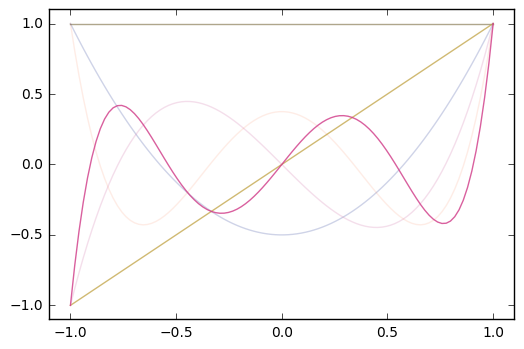

In [140]:
def createLegendrePlot(degree):
    """
    This function, given an input degree, plots legendre
    polynomials from degree zero to that degree, colouring
    each one with a random colour each time.
    
    Params:
        degree: How high a degree of legendre polynomials
        you want generated.
    """
    lPolys = generateLegendrePolynomials(degree)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    for entry in lPolys:
        plt.plot(entry.linspace()[0], entry.linspace()[1], c=np.random.rand(4,1))

createLegendrePlot(5)

In [112]:
#Question 2
def evalLegendre(x, degree):
    """
    This function is a helper function whic
    """
    degreeList = [0]*degree + [1]
    return np.polynomial.legendre.legval([x], degreeList)[0]

In [126]:
def getAllRoots(func, a, b, numOfDivisions, brentq = True, secantDecimals = 5):
    roots = []
    xRangeIntervals = np.linspace(a, b, numOfDivisions, endpoint = True)
    for numOfIntervals in range(1, len(xRangeIntervals)):
        if brentq:
            try:
                roots.append(scipy.optimize.brentq(func, xRangeIntervals[numOfIntervals-1], xRangeIntervals[numOfIntervals]))
            except:
                pass
        else:
            newValue = round(secantRootFinder(func, xRangeIntervals[numOfIntervals-1], xRangeIntervals[numOfIntervals]), secantDecimals)
            roots.append(newValue)
            roots = list(set(roots))
            roots.sort()
    return roots

def evalLegendreDegree(degree):
    return lambda x: evalLegendre(x, degree)

legendreFunctions = []
for degree in range(1, 6):
    legendreFunctions.append(evalLegendreDegree(degree))

currentDegree = 1
for function in legendreFunctions:
    print("Current Degree's:", currentDegree, ", Roots:", getAllRoots(function, -1, 1, 100))
    currentDegree+=1

Current Degree's: 1 , Roots: [0.0]
Current Degree's: 2 , Roots: [-0.5773502691896016, 0.5773502691896016]
Current Degree's: 3 , Roots: [-0.7745966692414834, 0.0, 0.7745966692414834]
Current Degree's: 4 , Roots: [-0.8611363115940526, -0.3399810435847288, 0.3399810435847288, 0.8611363115940526]
Current Degree's: 5 , Roots: [-0.9061798459386241, -0.5384693101053333, 0.0, 0.5384693101053333, 0.9061798459386241]


In [127]:
#Question 3
def secantRootFinder(function, xBegin, xEnd, yTolorance = 1e-12):
    yCheck = abs(function(xEnd))
    while yCheck >= yTolorance:
        xOld = xEnd
        xEnd = xEnd - function(xEnd) * (xEnd-xBegin) / (function(xEnd)-function(xBegin))
        xBegin = xOld
        yCheck = abs(function(xEnd))
    return xEnd

In [133]:
#Question 4
legendreDegree5 = evalLegendreDegree(5)
print(getAllRoots(legendreDegree5, -1, 1, 10, False))

[-0.90617999999999999, -0.53847, -0.0, 0.53847, 0.90617999999999999]


In [134]:
#Question 5
print(getAllRoots(myfunc, -1, 10.0, 101, False))

[-7.5335700000000001, -4.1726000000000001, -0.0, 4.1726000000000001, 7.5335700000000001, 13.959960000000001]
